# House Price Prediction

Writer: Zihang WANG_AIS

Date: 21/02/2024

Envrionment: ~/requirements.txt

## Abstact

This project is for DSP(2024 Spring) only, more information about the dataset and background [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  It aims to create a model to predict the saleprices of the houses by following these steps: 

Data setup(load, train and test sets split, etc)

Feature selection: select a minimum of 2 continuous and 2 categorical features

Feature processing: process, scale and encode the different features

Model training

Model evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

## Data Loading

In [2]:
data_train = pd.read_csv("data/housing_price_train.csv")
data_test = pd.read_csv("data/housing_price_test.csv")

In [3]:
# Train/Test Checking
data_train.shape, data_test.shape

((1460, 81), (1459, 80))

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Pre-processing

In [6]:
data_train = data_train.drop(columns = 'Id')

In [7]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/Users/ericwindsor/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


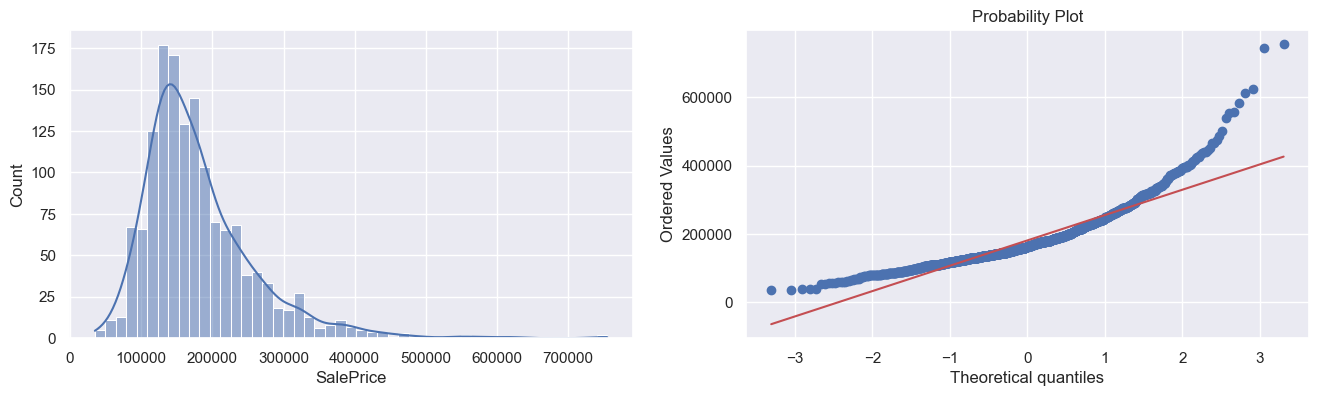

In [8]:
sns.set_theme()
fig, axs = plt.subplots(1, 2, figsize=(16, 4)) 
sns.histplot(data_train['SalePrice'], kde=True, ax=axs[0])
stats.probplot(data_train['SalePrice'], plot=axs[1])

plt.show()

/Users/ericwindsor/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


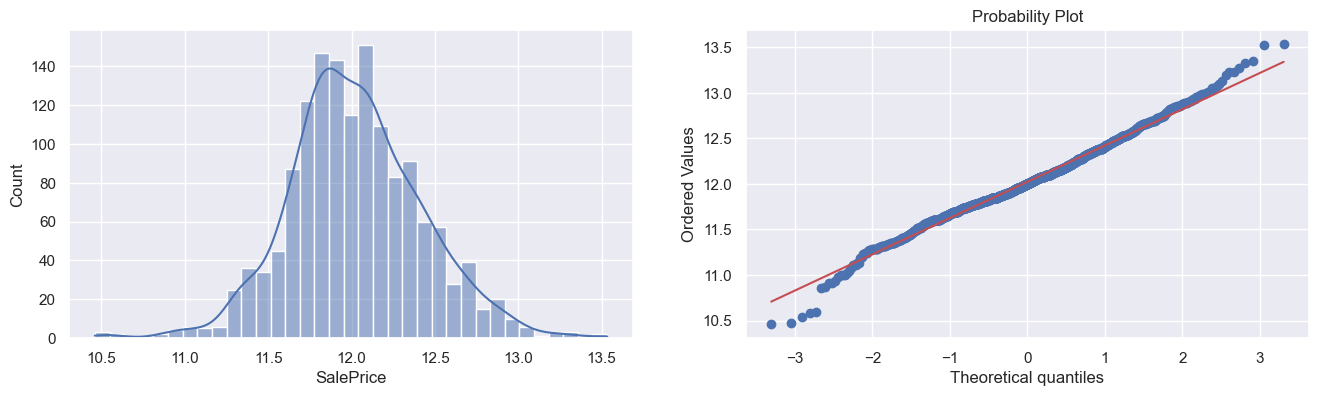

In [9]:
# Log for the right side tail 
data_train['SalePrice'] = np.log(data_train['SalePrice'])
fig, axs = plt.subplots(1, 2, figsize=(16, 4)) 
sns.histplot(data_train['SalePrice'], kde=True, ax=axs[0])
stats.probplot(data_train['SalePrice'], plot=axs[1])

plt.show()

## Feature selecting

By taking reality into account, the type, area and age may be the essensial factors of housing prices. In the case, I choose MSZoning, BldgType and YearBuilt as categorial features; OverallQual and TotalSF(total areas created by myself) as continous features


In [10]:
selected_columns = ['MSZoning', 'BldgType', 'YearBuilt', 'OverallQual', 'TotalSF']
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF']
data_train_filter = data_train[selected_columns]

In [11]:
data_train_filter.isnull().sum()

MSZoning       0
BldgType       0
YearBuilt      0
OverallQual    0
TotalSF        0
dtype: int64

## Model Training

Since the saleprice data after processed obeys normal distribution, linear regression model could be used for the dataset

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X = pd.get_dummies(data_train_filter,drop_first=True)
y = data_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

## Model evaluation

In [15]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
round(rmsle, 2)

0.01